# Introduction

This problem focuses on the prediction of probable customers buying caravan insurance. The data set provided was part of the CoIL challenge in 2000. There are two main components in the problem. Firstly, identifying the customers who would like to buy the caravan insurance, and secondly an explanation of the customer behaviour which helped us in predicting the above behaviour.

As the data consists of real world data, it has 86 variables, half of those relate to socio-demographic data whereas the other half relates to product ownership data. The training set consists of 5822 records, including the information of whether the customers hold a caravan insurance. The dataset for predictions have 4000 records, where the target variable is missing. The target variable for the predictions is present in another file.

For the prediction task it is expected to find the set of 800 customers out of the 4000 who are more likely to buy the caravan insurance policy.

For the description task, it is expected to be explaninable to a marketing professional, who is not expected to have any information about machine learning. The final outcome of Machine Learning is its profiatbility in business scenarios. Thus, an explanatory model is expected from a business perspective.

The data dictionary explains the variables that were used in the dataset.

## Importing libraries

In [1]:
library(psych)
#options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)


# Data Exploration
## Reading the train data

In [2]:
source("read_data.R")
head(caravan_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


## Checking the dimensions of the data
We can see that there are 5822 records and 86 columns as expected based on the description of the task.



In [3]:

dim(caravan_data)

[1] 5822   86

## Checking the structure of the data

On evaluating the structure of the dataframe we see that all the columns have discrete values, and are of type int. It would be preferable to convert the target response to a factor as we have to use classification algorithms to predict whether the customer is a propective buyer or not.



In [4]:
str(caravan_data)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

## Convert target to factor

In [5]:
caravan_data$V86=as.factor(caravan_data$V86)


## Summary of the data

In [6]:
summary(caravan_data)



       V1              V2               V3              V4       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       V5               V6               V7              V8      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
       V9             V10             V11              V12      
 Min.   :0.

### Detailed summary

In [7]:
round(describe(caravan_data), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,5822,24.253,12.847,30,24.984,11.861,1,41,40,-0.435,-1.353,0.168
V2,2,5822,1.111,0.406,1,1.000,0.000,1,10,9,7.416,99.985,0.005
V3,3,5822,2.679,0.790,3,2.645,1.483,1,5,4,0.183,0.011,0.010
V4,4,5822,2.991,0.815,3,2.951,0.000,1,6,5,0.472,0.619,0.011
V5,5,5822,5.774,2.857,7,5.901,2.965,1,10,9,-0.331,-1.345,0.037
V6,6,5822,0.696,1.003,0,0.521,0.000,0,9,9,2.237,8.617,0.013
V7,7,5822,4.627,1.716,5,4.633,1.483,0,9,9,0.074,0.454,0.022
V8,8,5822,1.070,1.018,1,0.957,1.483,0,5,5,0.902,0.788,0.013
V9,9,5822,3.259,1.598,3,3.321,1.483,0,9,9,-0.131,-0.032,0.021
V10,10,5822,6.183,1.909,6,6.328,1.483,0,9,9,-0.719,0.681,0.025


### Observations
* Some of the predictors have a very high kurtosis value which means that the predictors have a heavy tail as compared to a normal distribution resulting in a lot of outliers. We will look at each variable later with respect to their distribution and outliers.
* V1, i.e. Customer Subtype as mentioned in the [data dictionary](https://kdd.ics.uci.edu/databases/tic/dictionary.txt) has 41 different categories detailed in the link. Similarly, V4, i.e. Avg age can be identified as categories as mentioned in the [data dictionary](https://kdd.ics.uci.edu/databases/tic/dictionary.txt).
* One major observation from the dataset is that all the predictors have discretised by the insurance company so there is not much of wrangling to be done prioir to the model buildidng process.
* We can see that there is pattern in which the predictors have been observed. 
	+ V1 has been identified as 41 different categories, 
	+ V2 (number of houses) ranges from 1 to 10, and is heavy tailed towards the right which means the dataset has customers with more houses than a normally distributed one.
	+ V3 (avg size household) ranges from 1-6, 
	+ V4 (avg age) is identified as 6 different categories, 
	+ V5 (customer main type) L2 is identified as 10 different categories
	+ V6 to V43, i.e. the rest of the socio-demographic data is identified based on zipcodes, and as these are precentages mentioned in the [data dictionary](https://kdd.ics.uci.edu/databases/tic/dictionary.txt), it is likely to explain the percentage of people belong to that particular category in that customer's zipcode. For example, if V6 explains Roman Catholic as 7, it means that, 76-88% of people in that zipcode are Roman Catholic
	+ V44 to V64 (number of policies), means that the number of policies in that category held by the customer in the range of 1 to 12, few of the predictors in this bracket are also heavy tailed.
	+ V65 to V85 (contribution to policies) means the amount category contributed by a customer as part of that policy held. Similar to the previous predictors, this is also heavy tailed as compared to a normal distribution, which implies that customers tend to contribute more to certain categories of insurance.
	
	

## Distributions of the predictors with respect to the target

### Plots




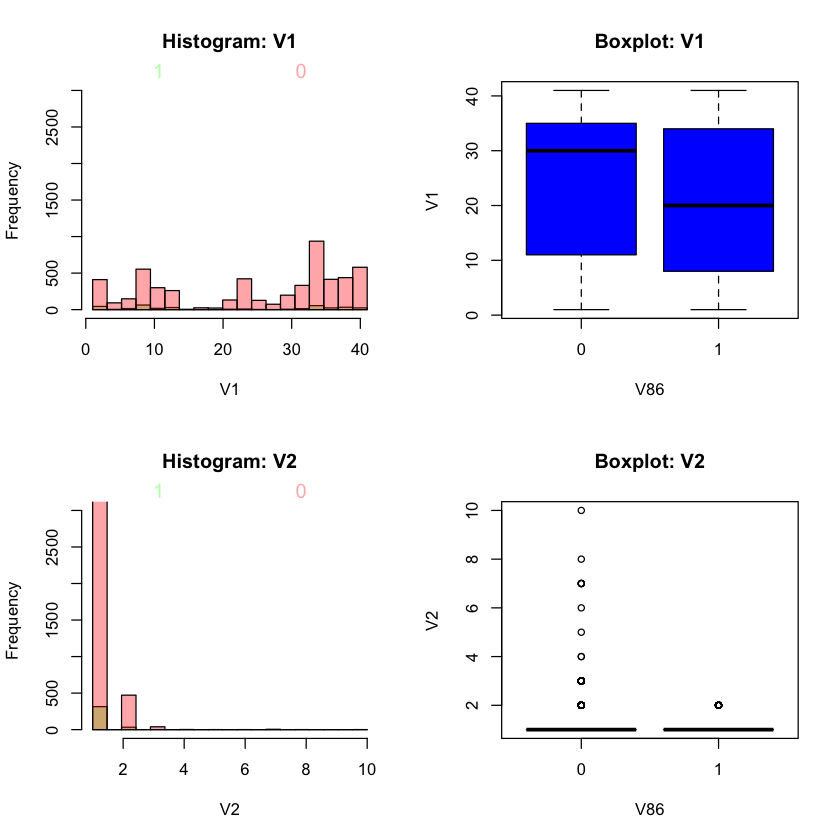

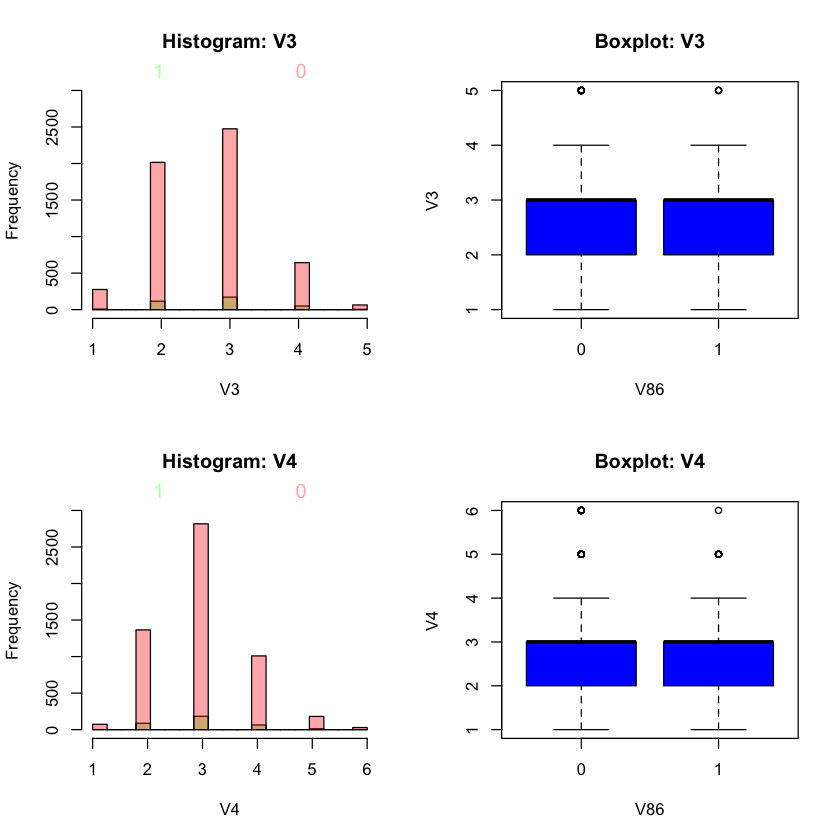

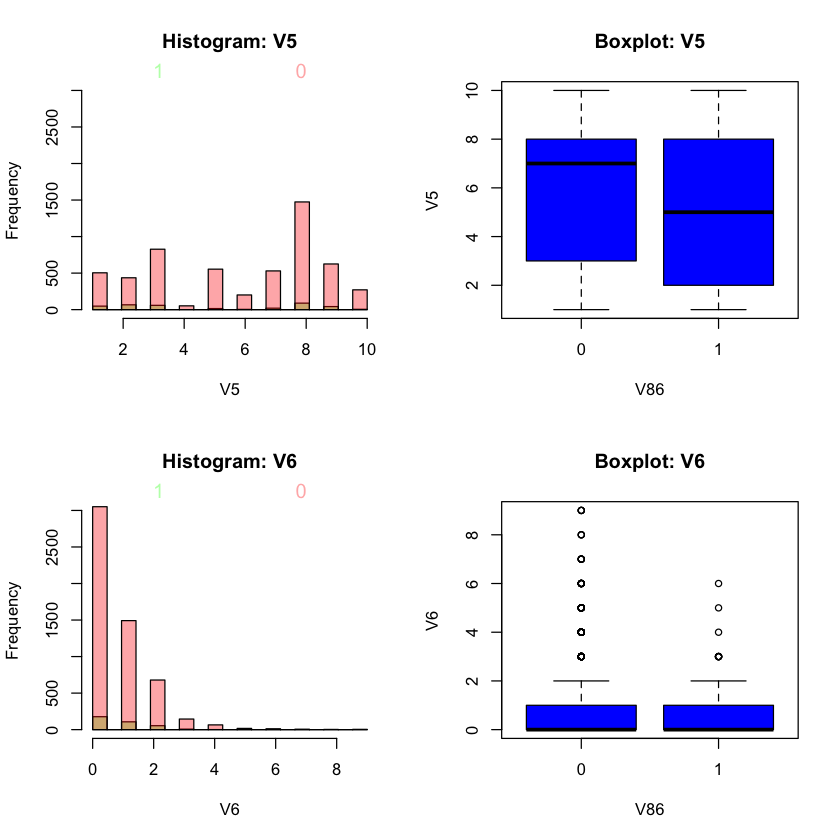

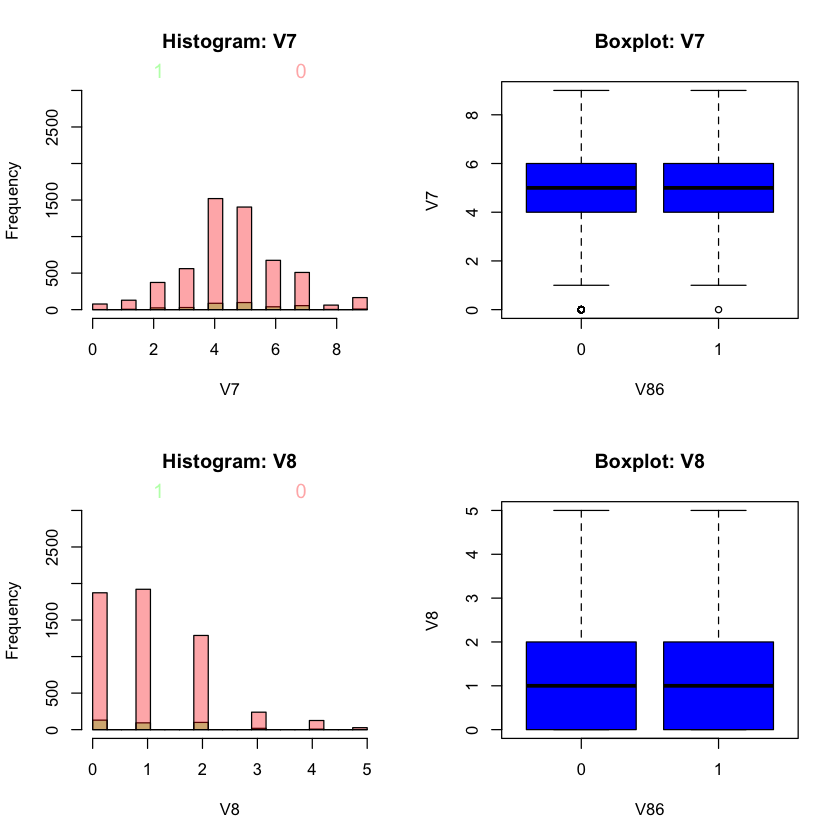

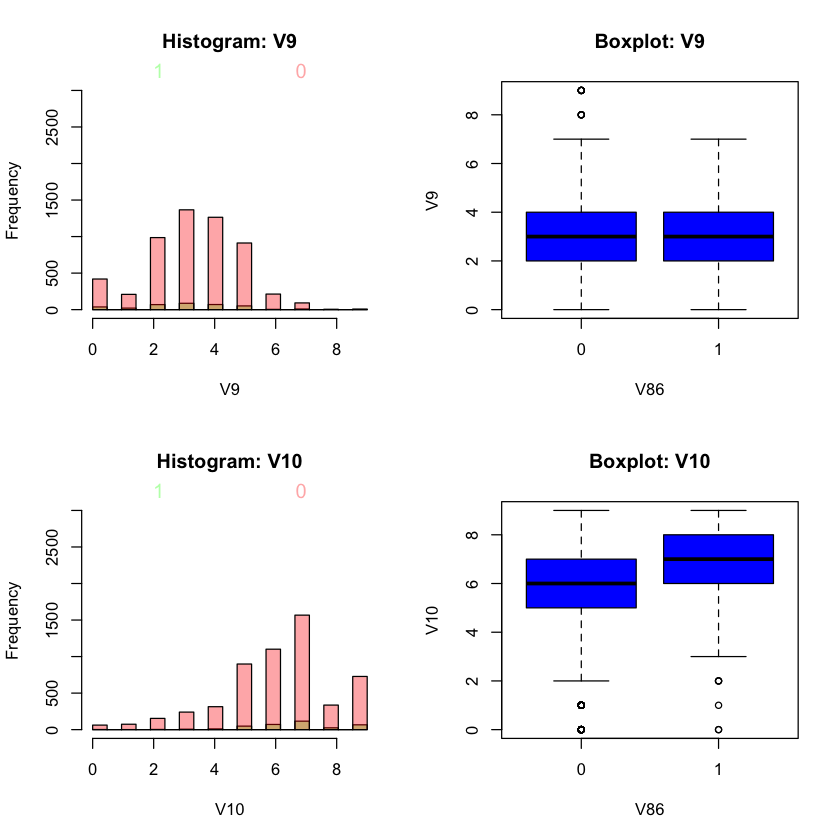

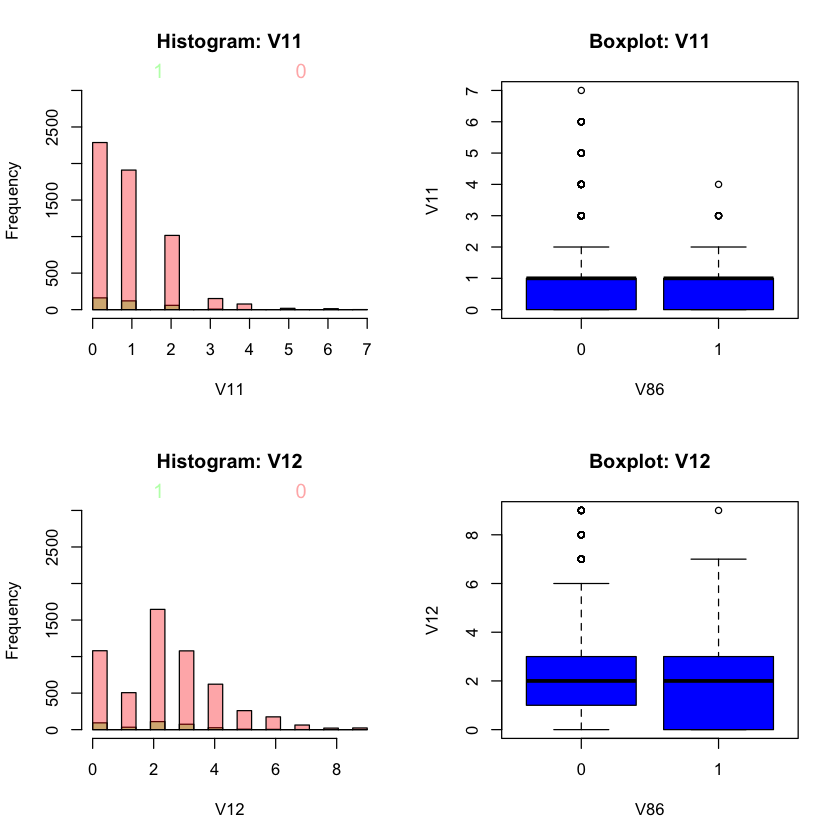

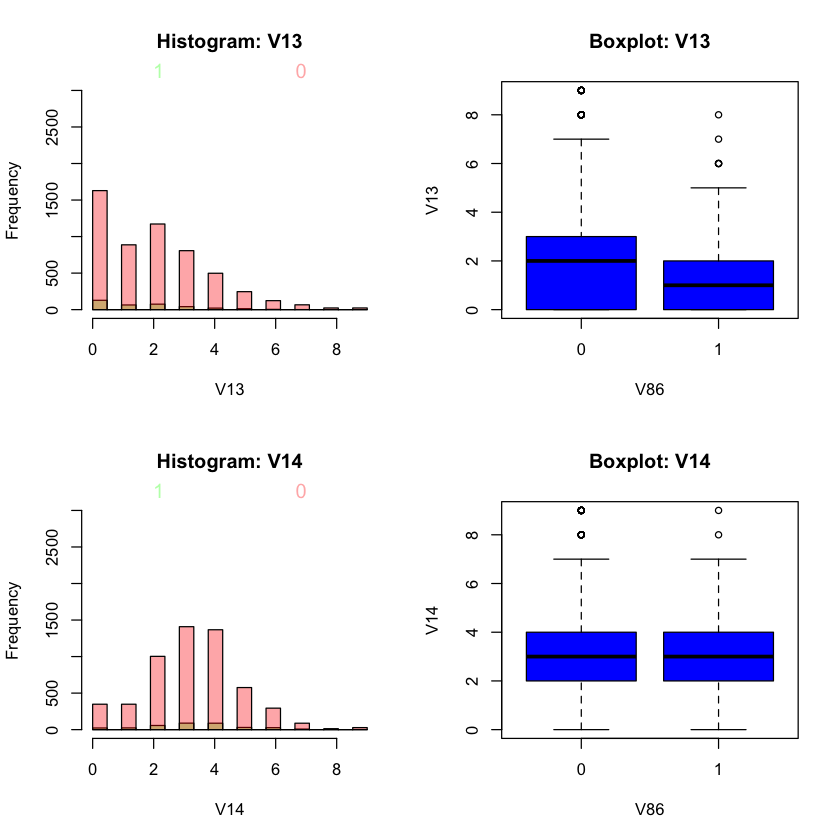

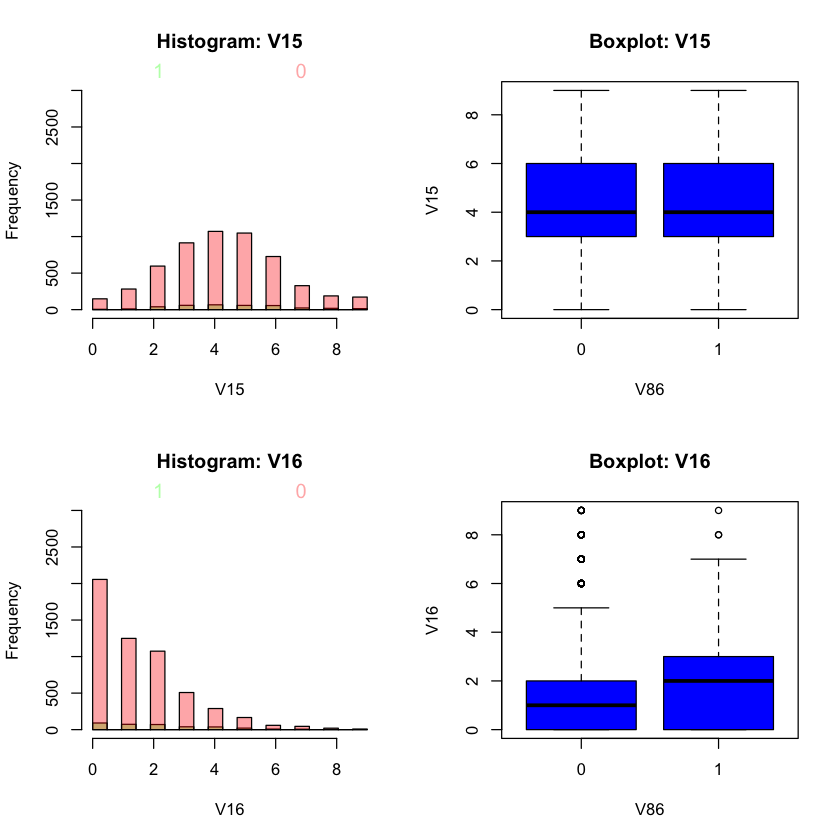

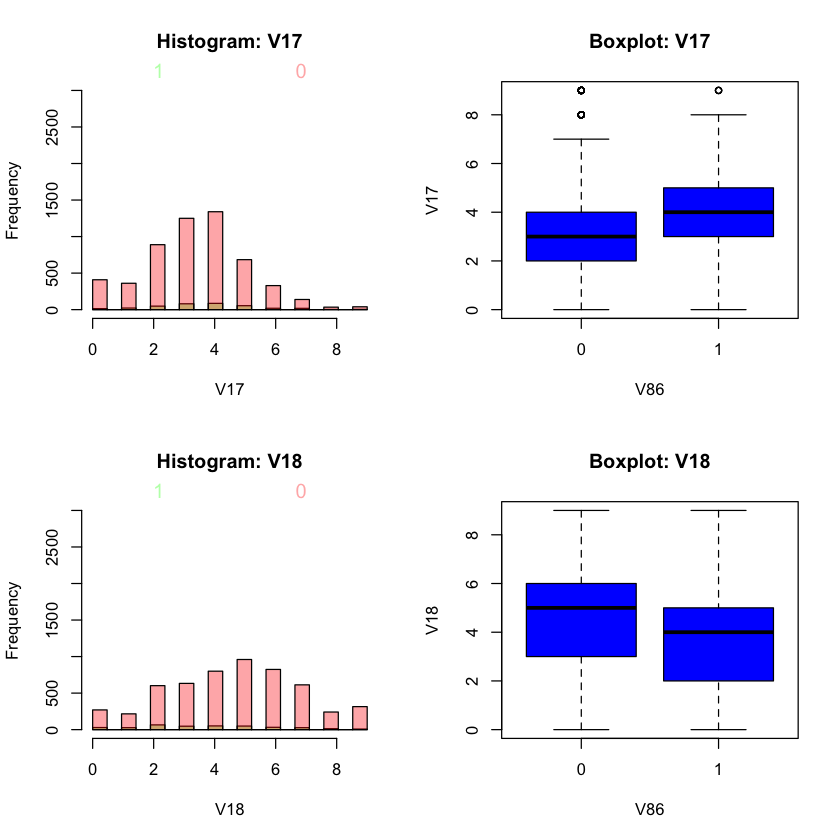

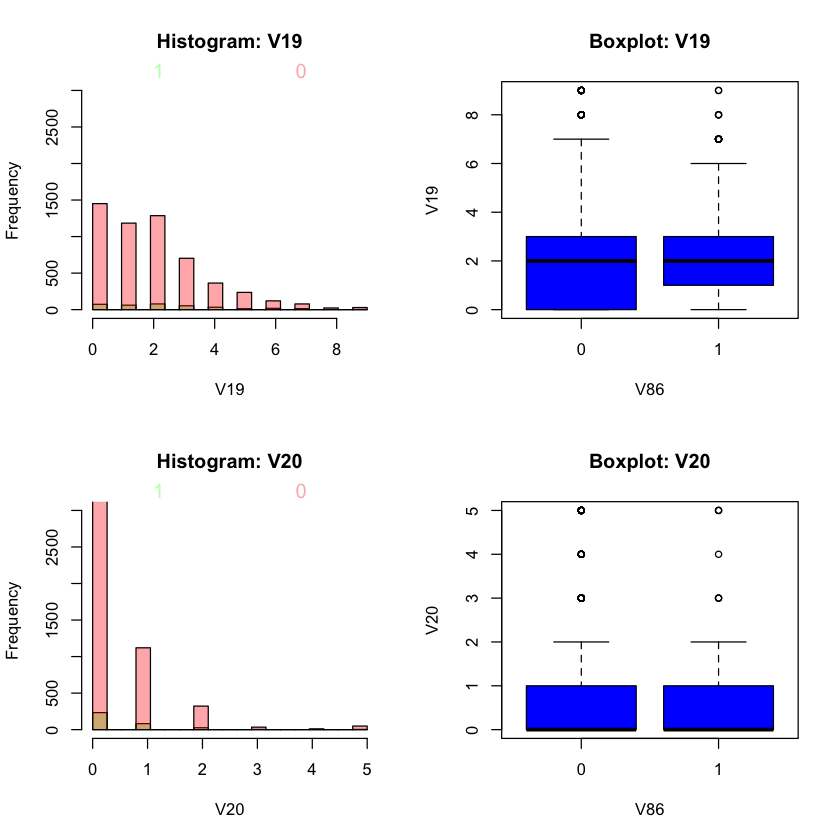

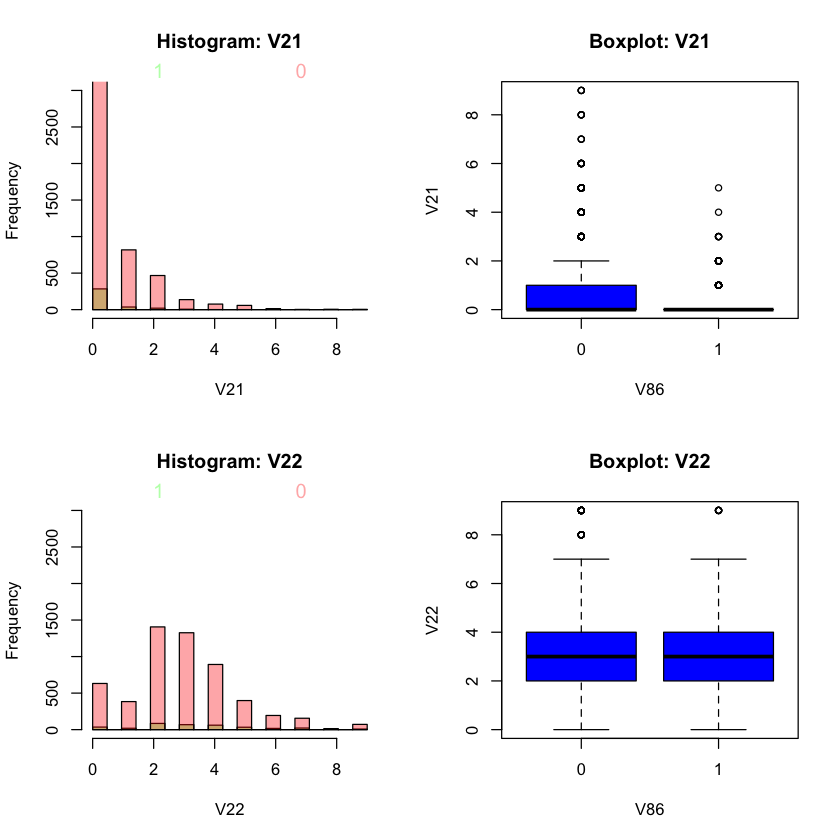

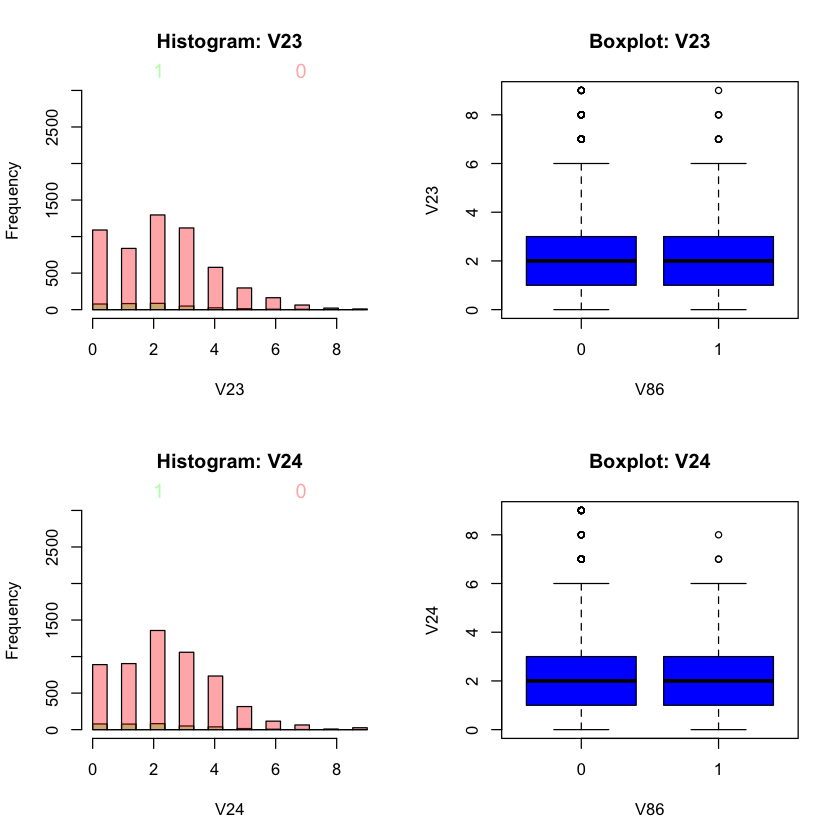

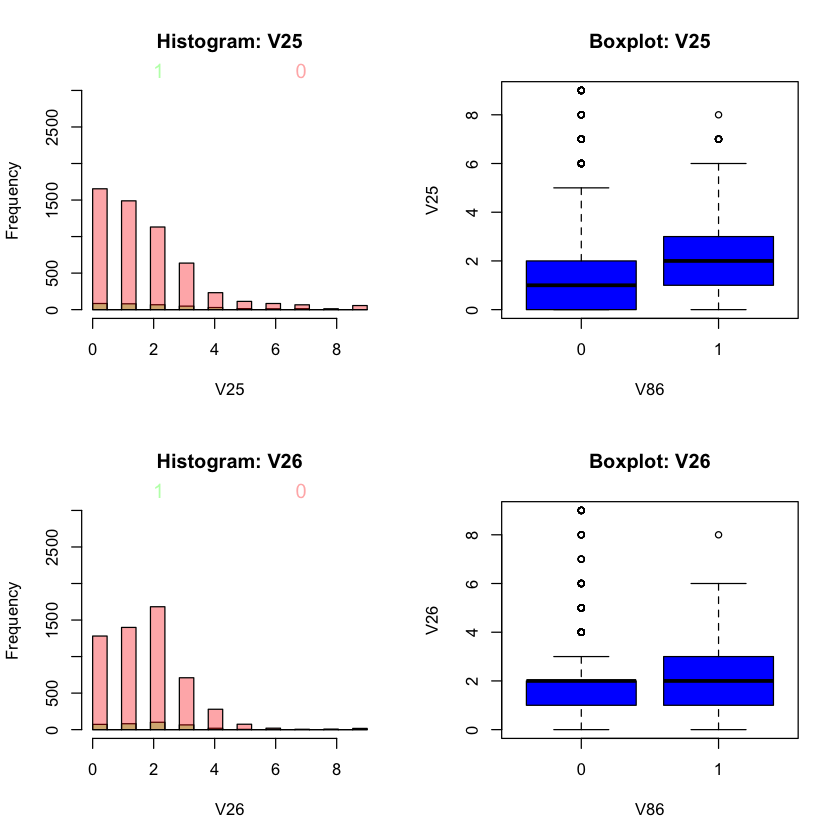

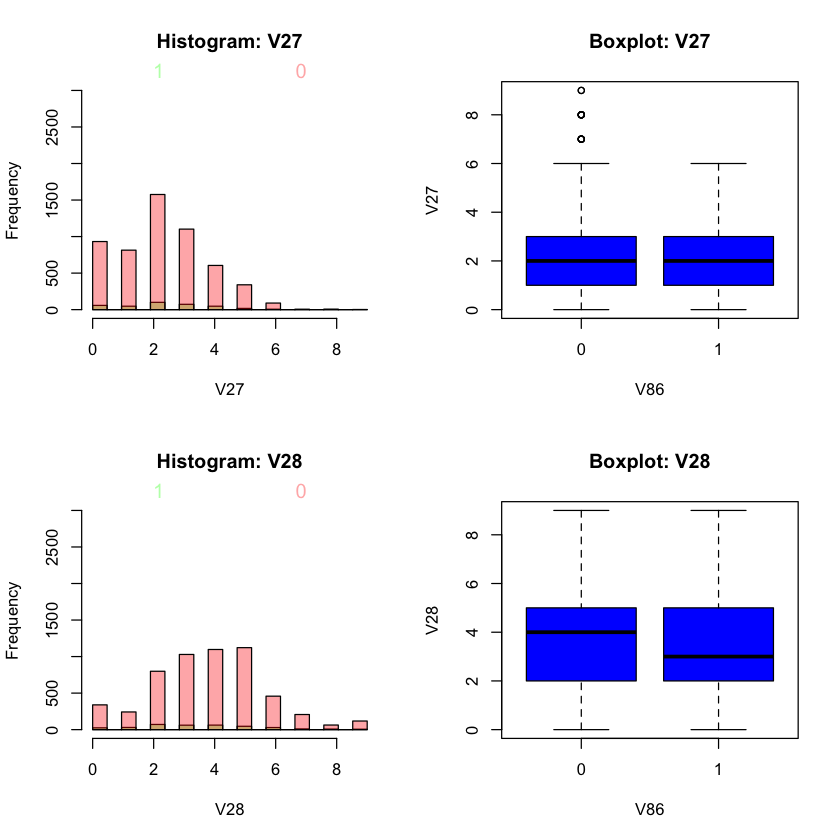

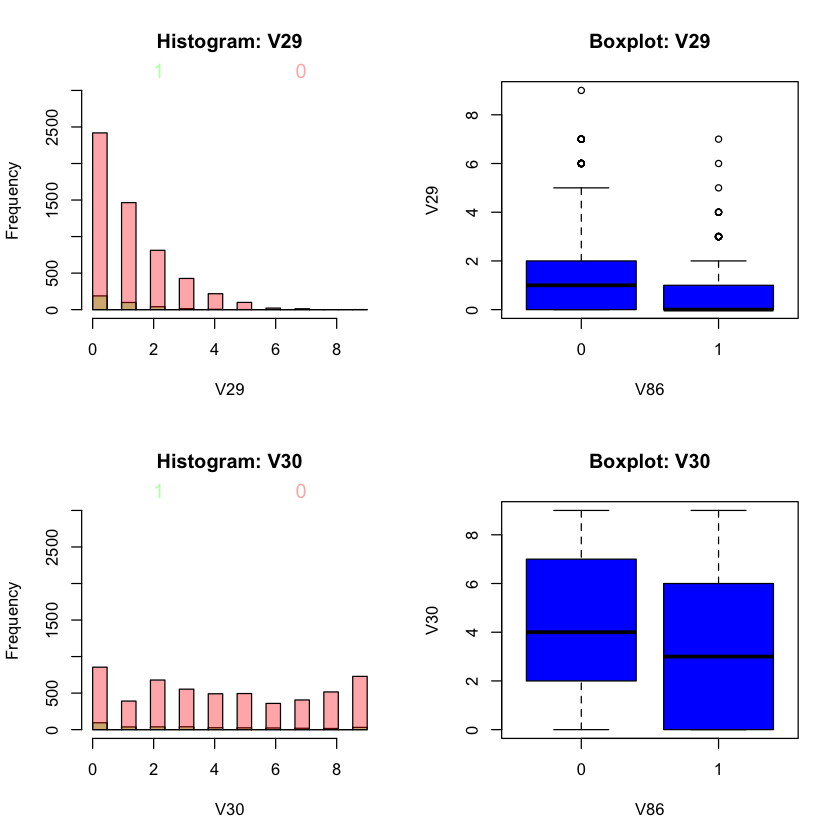

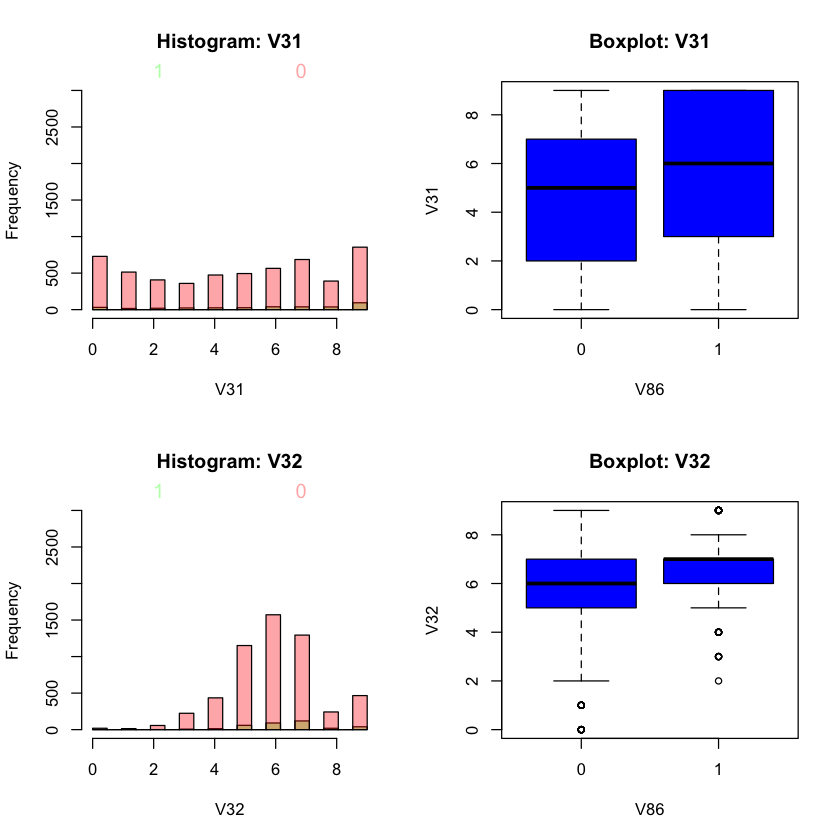

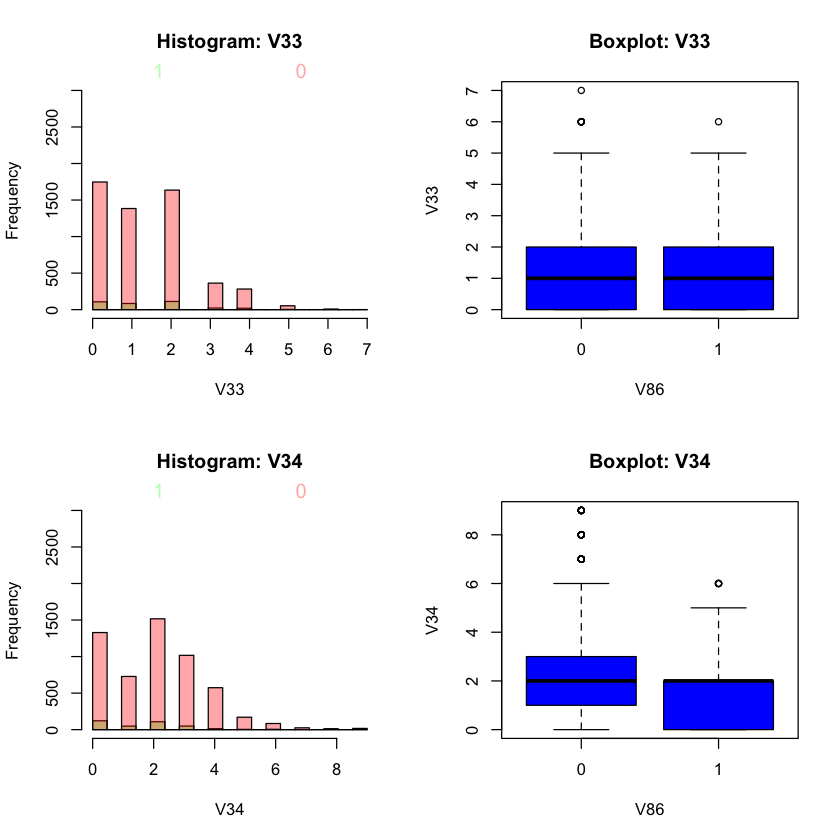

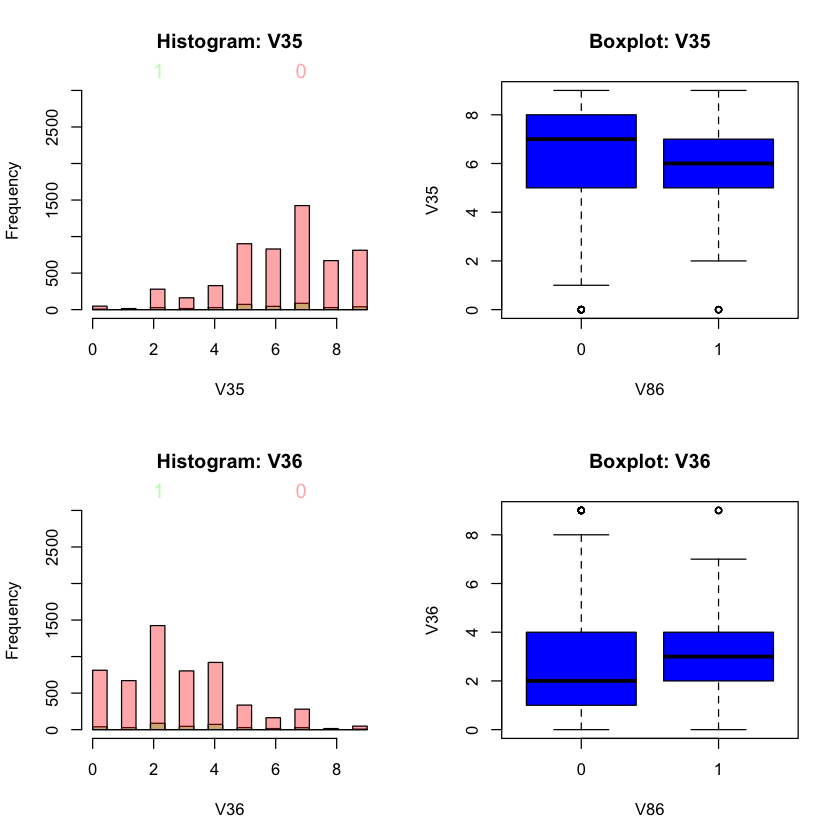

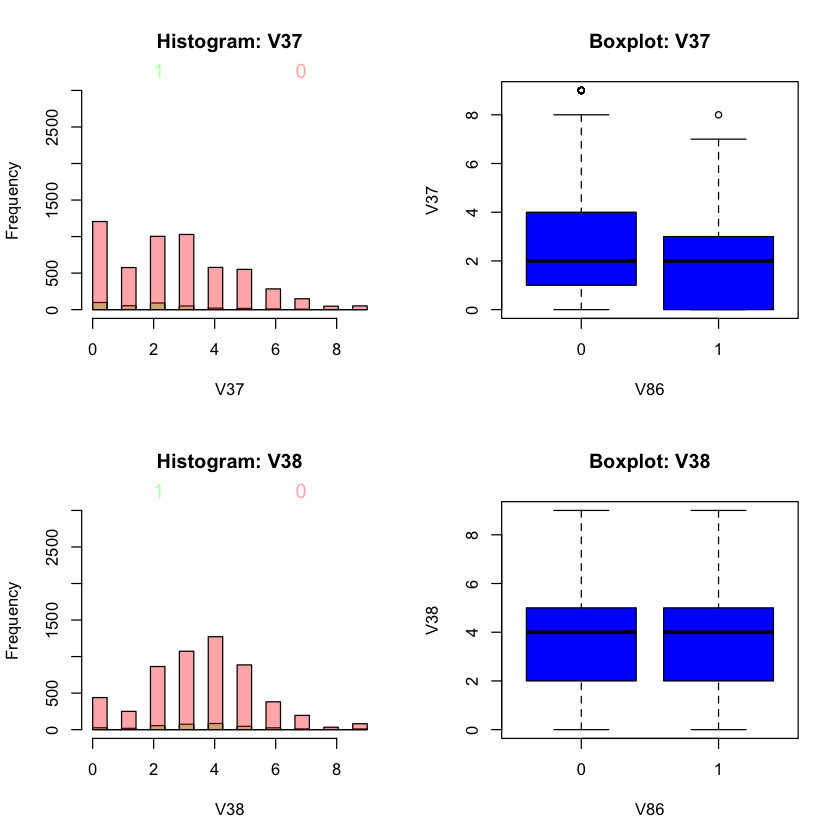

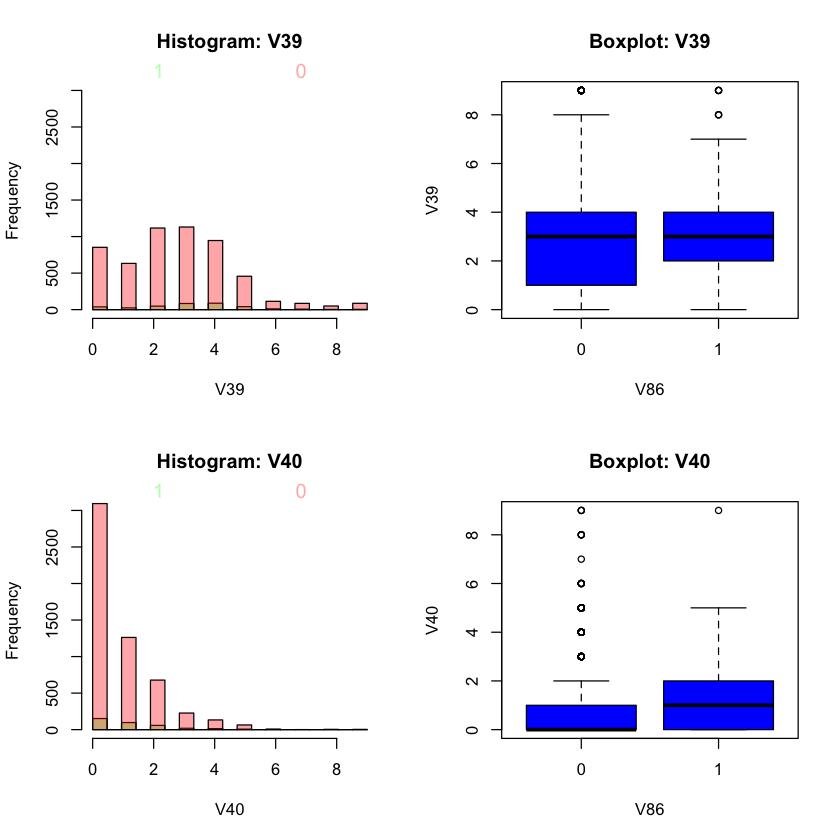

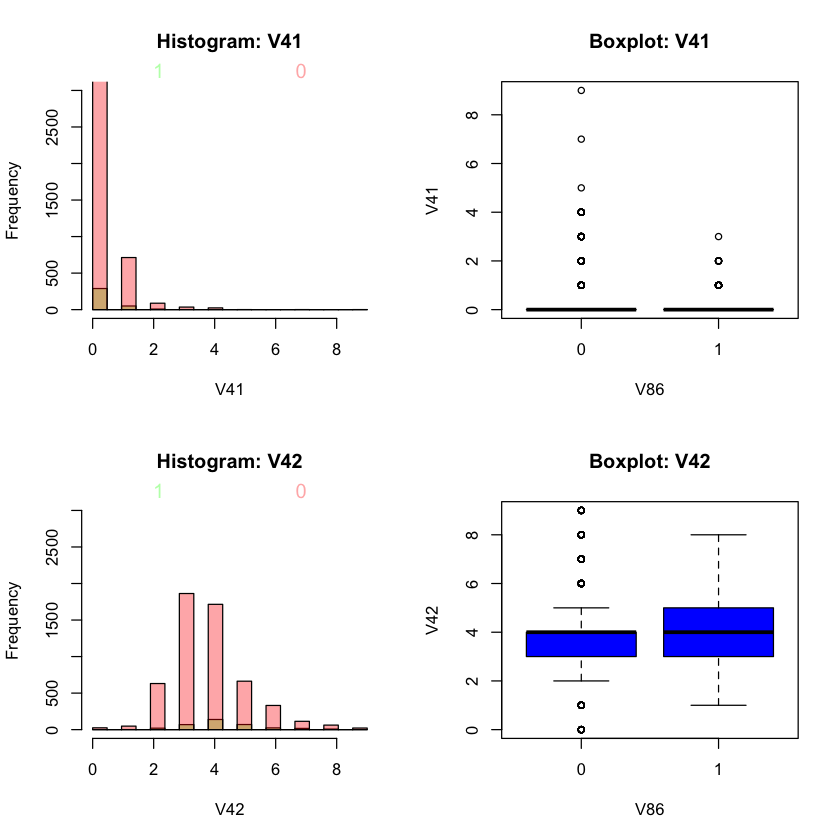

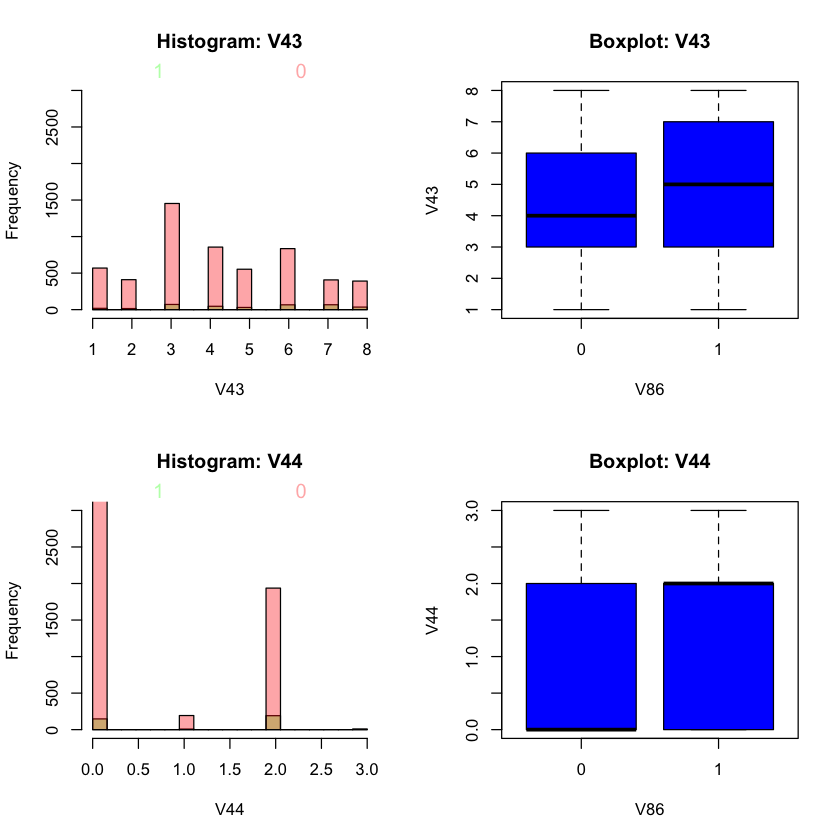

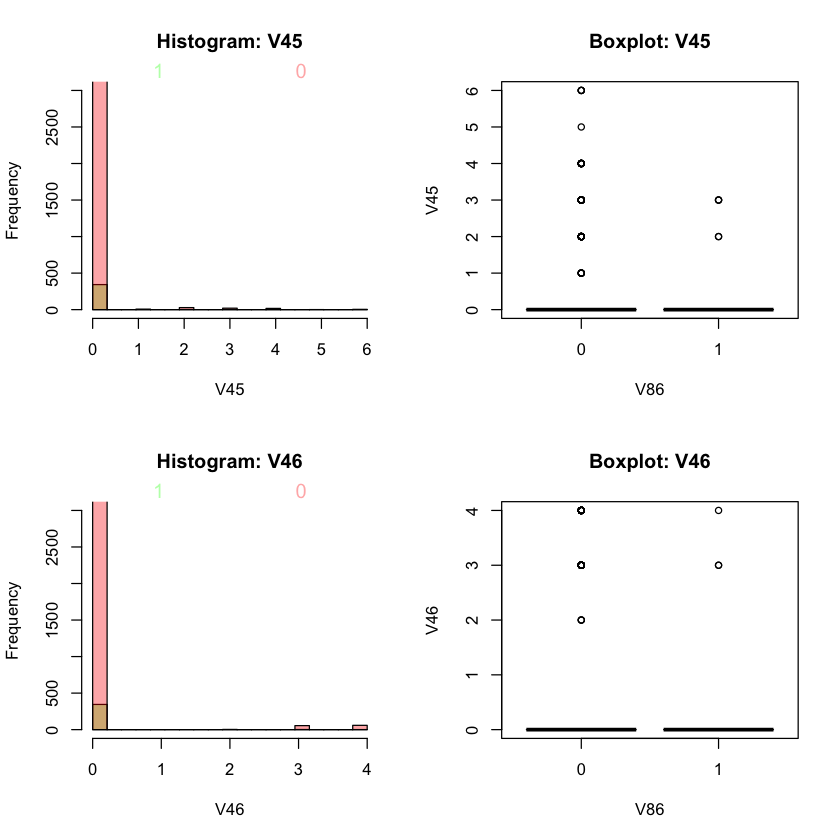

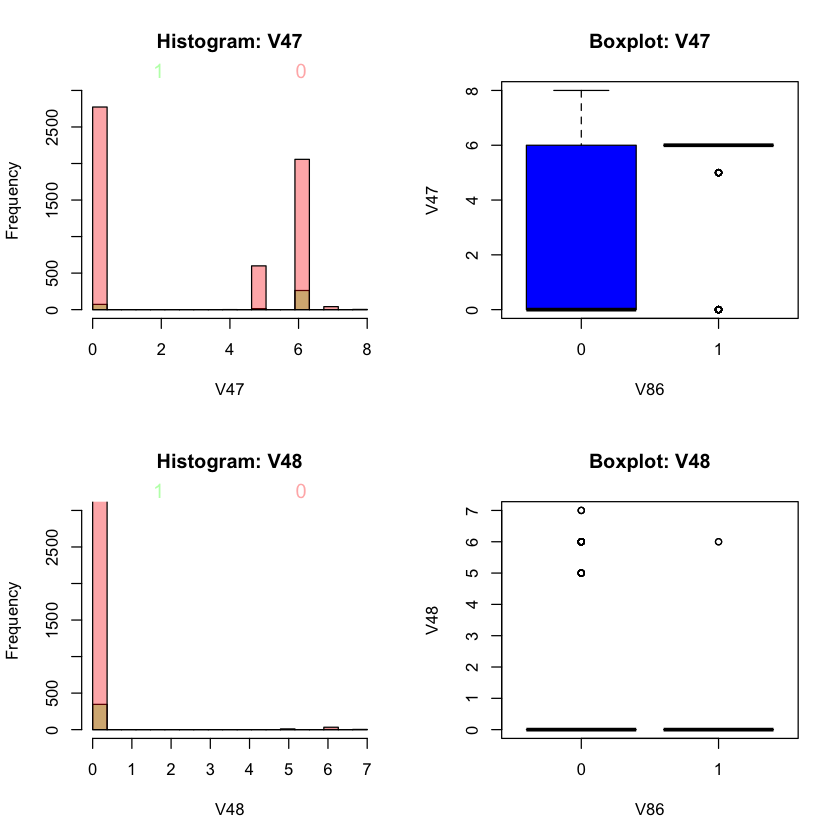

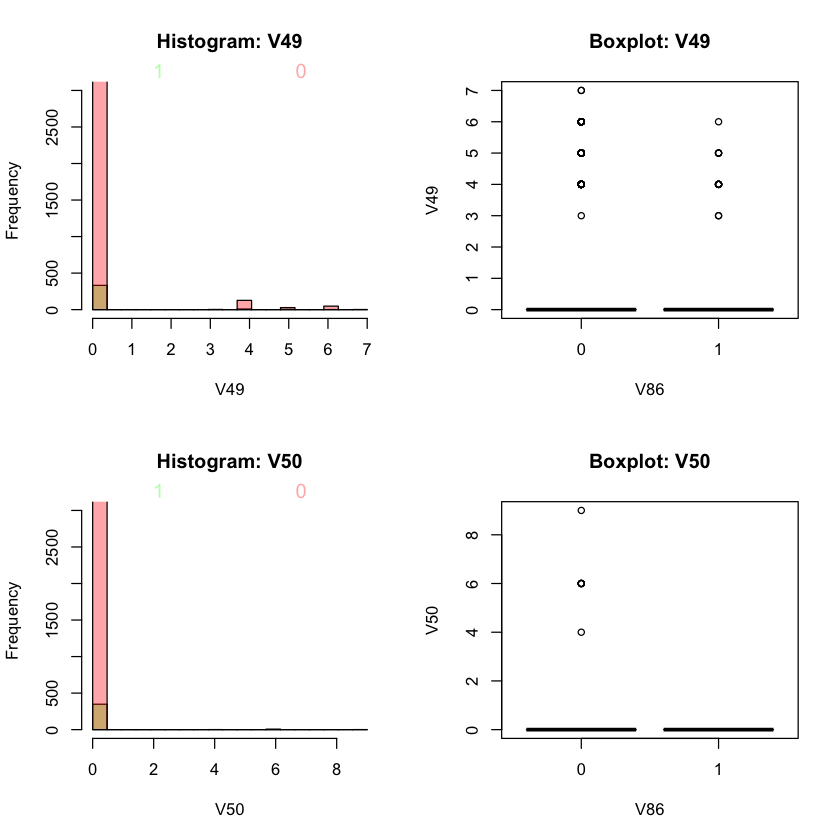

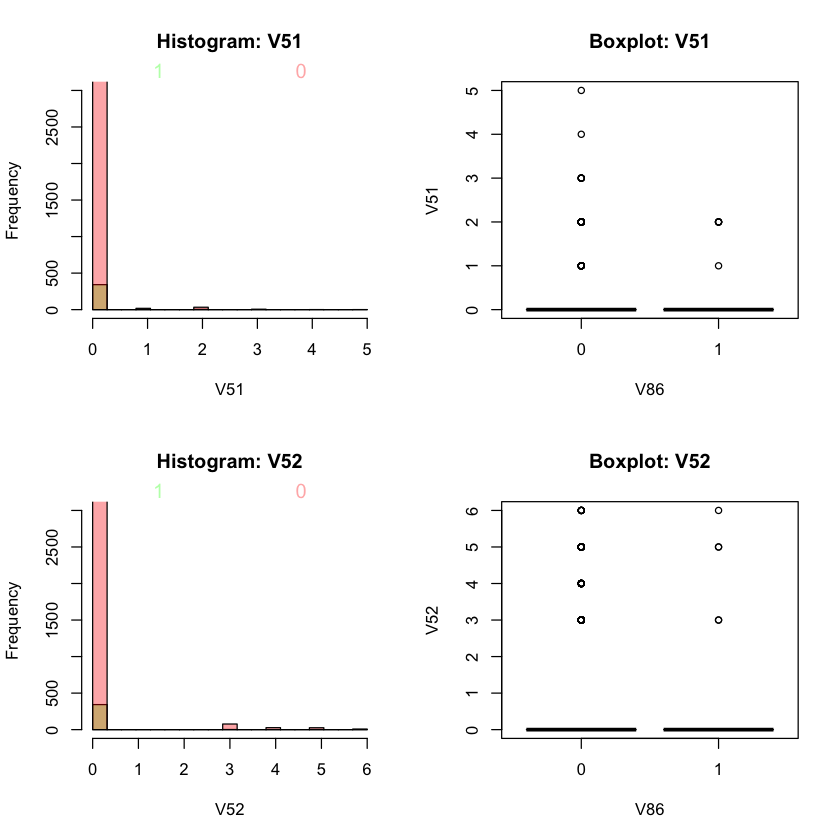

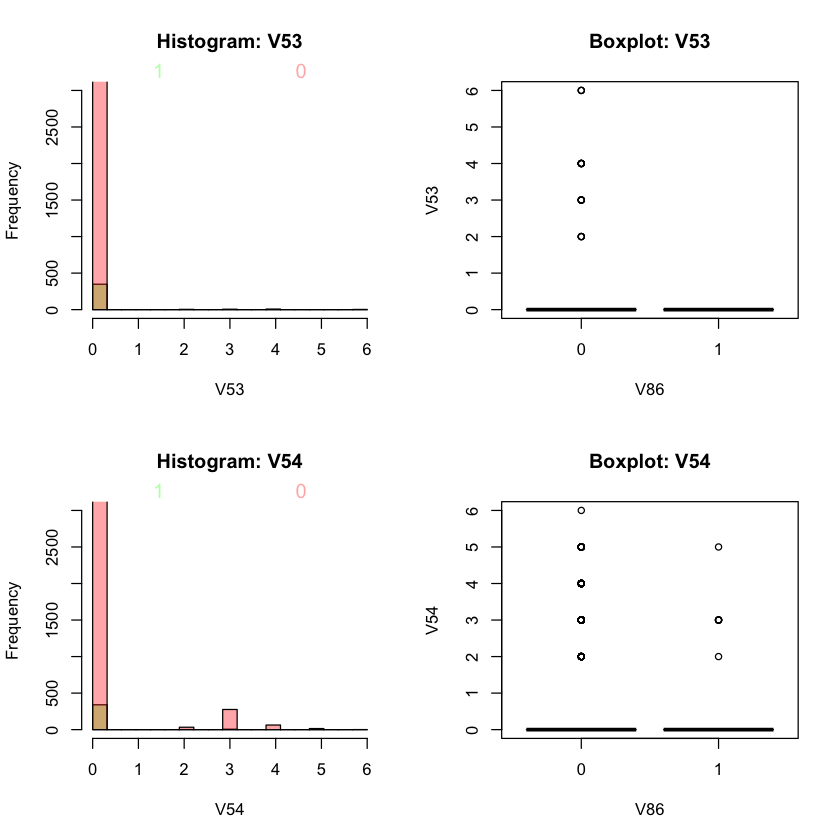

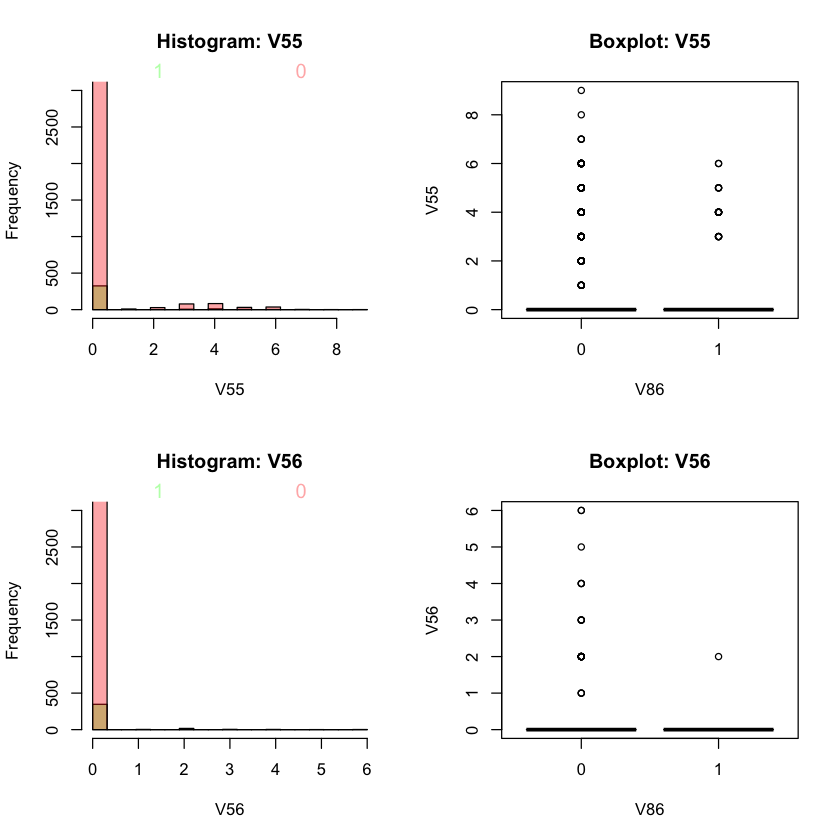

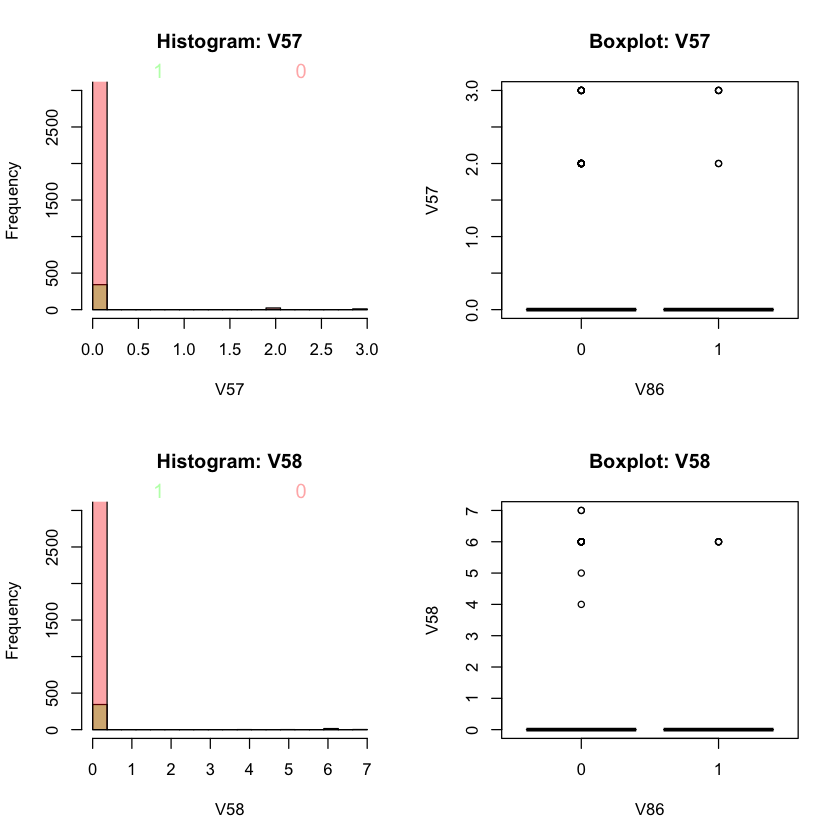

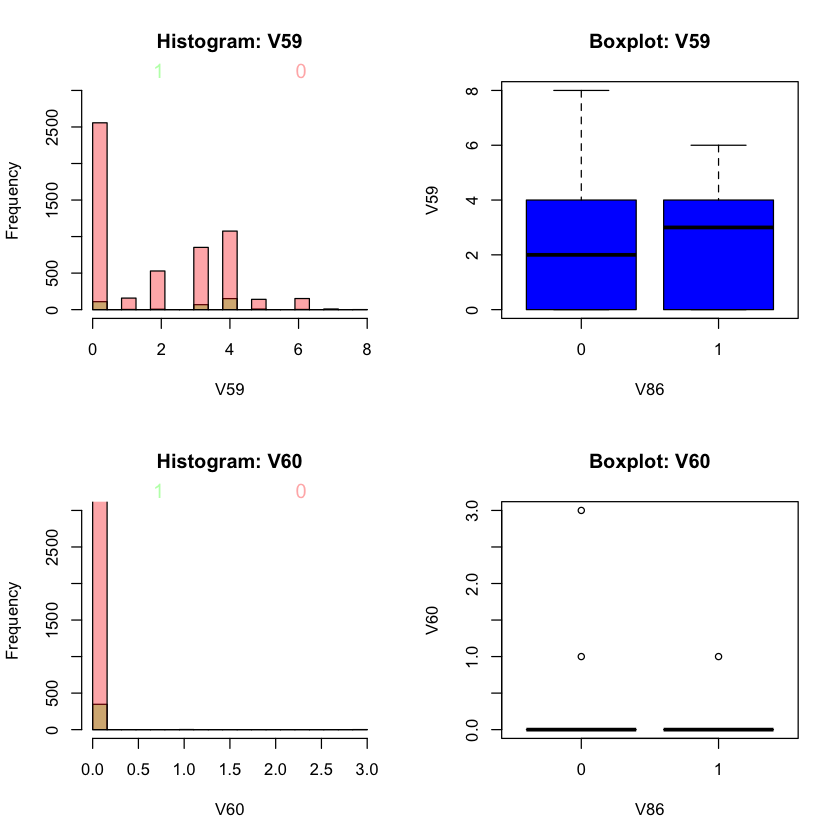

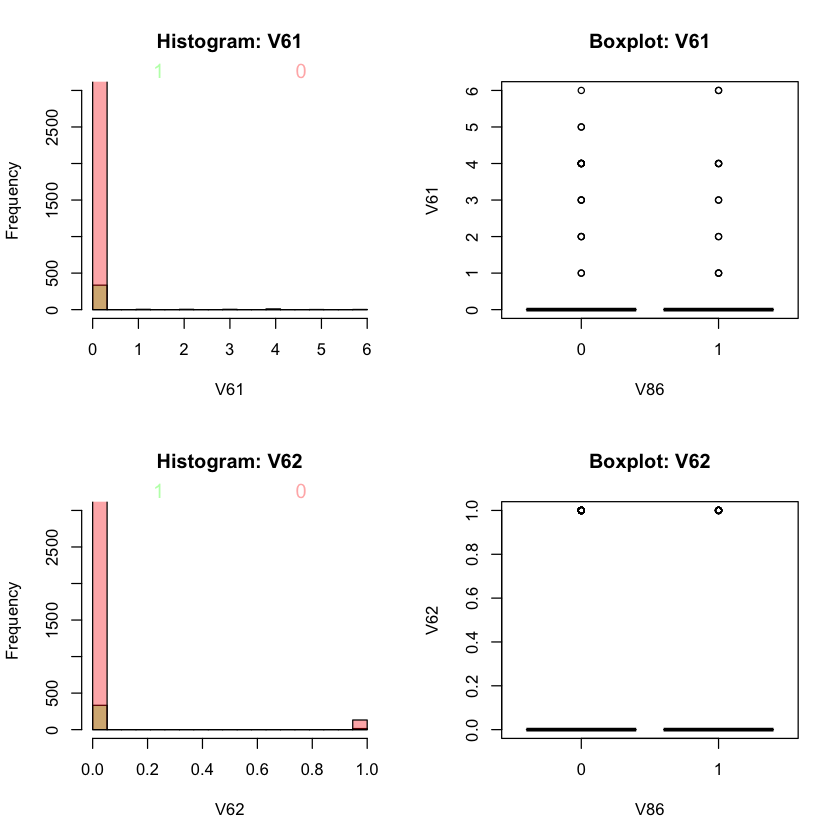

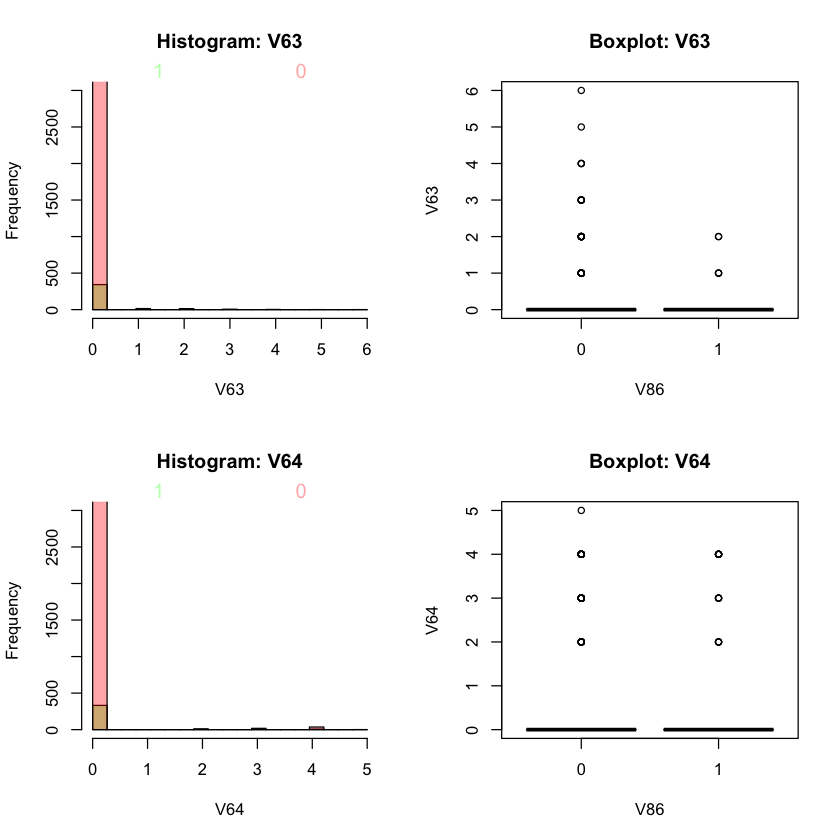

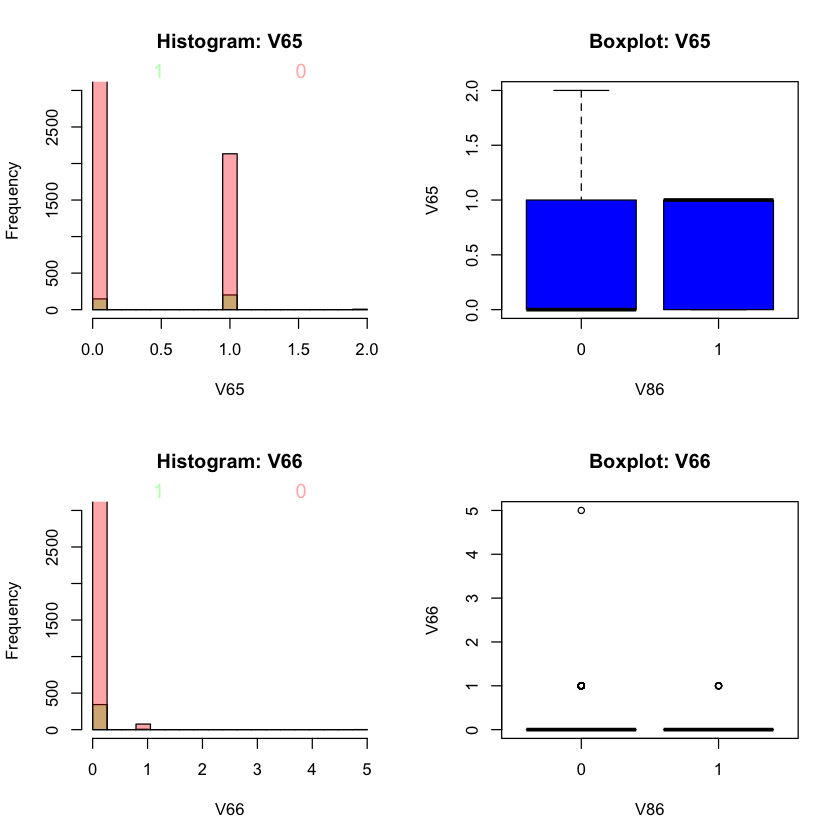

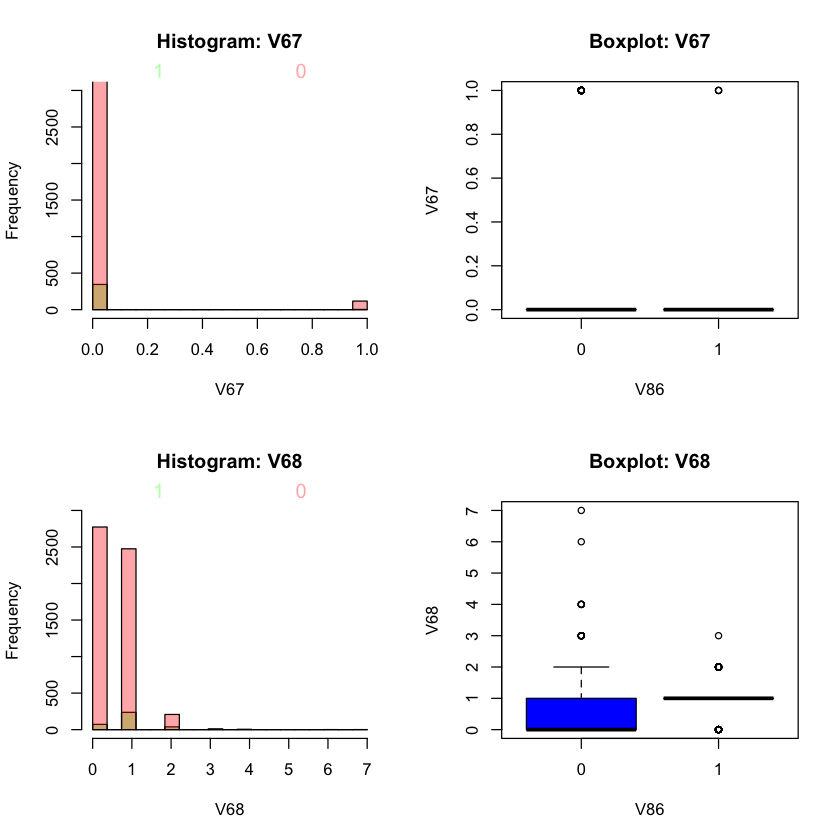

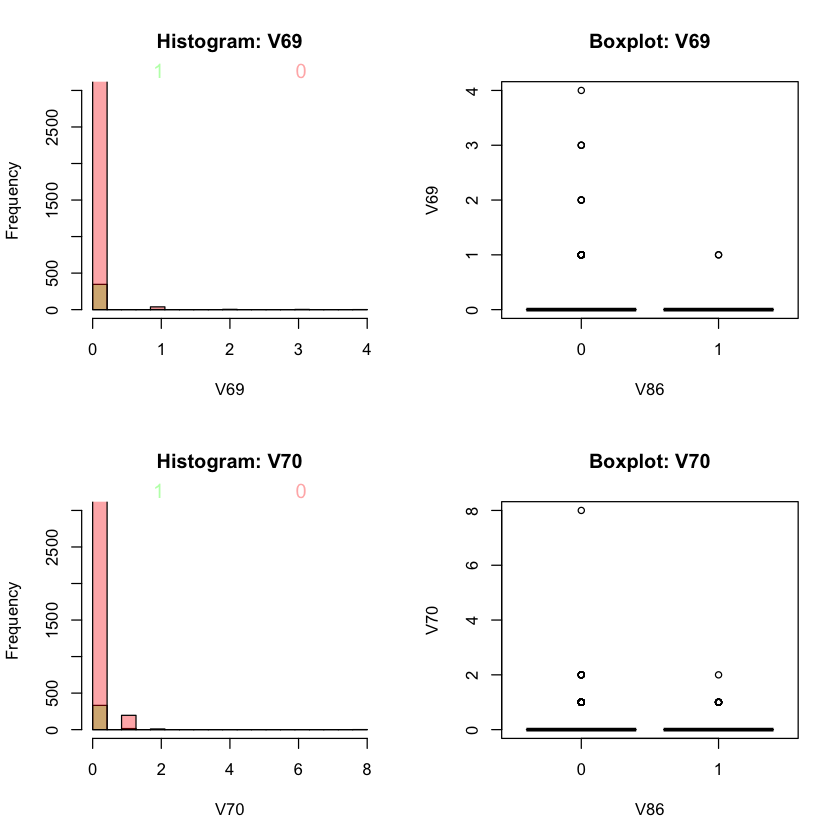

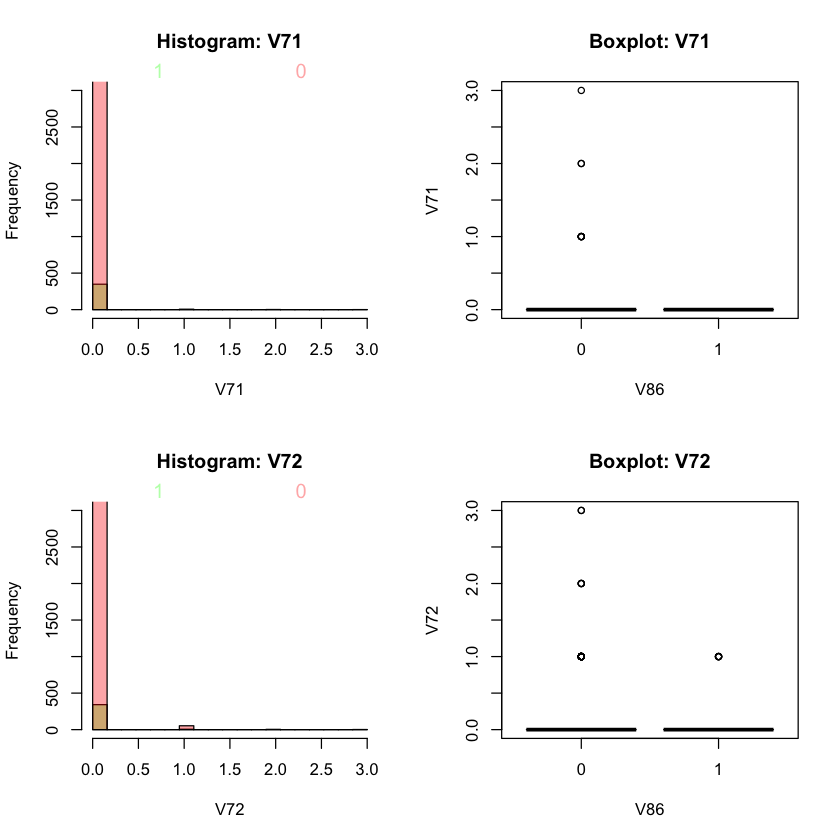

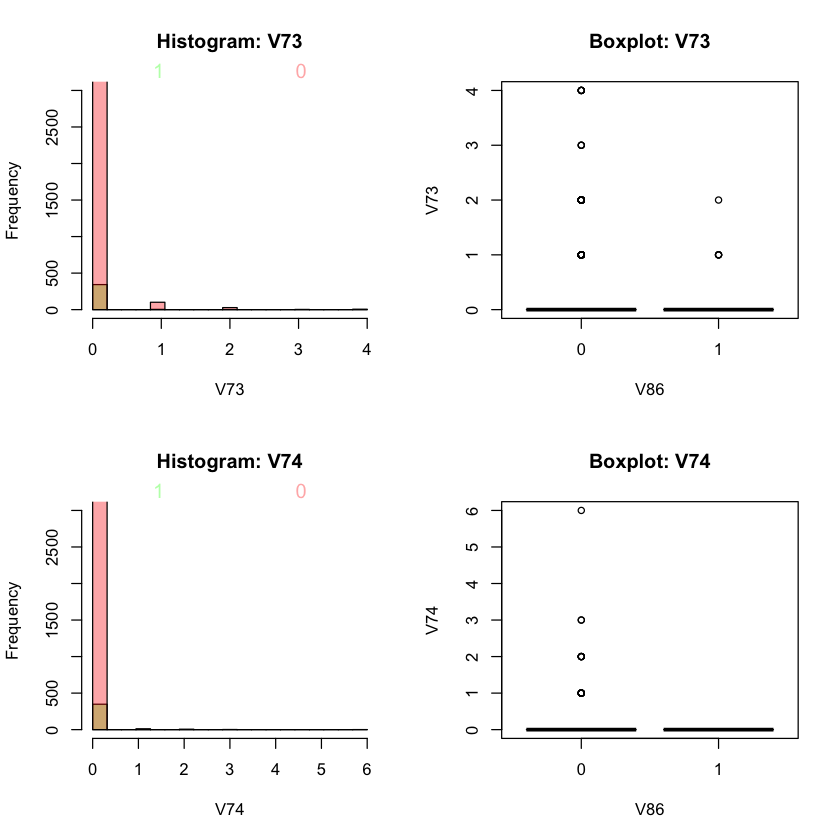

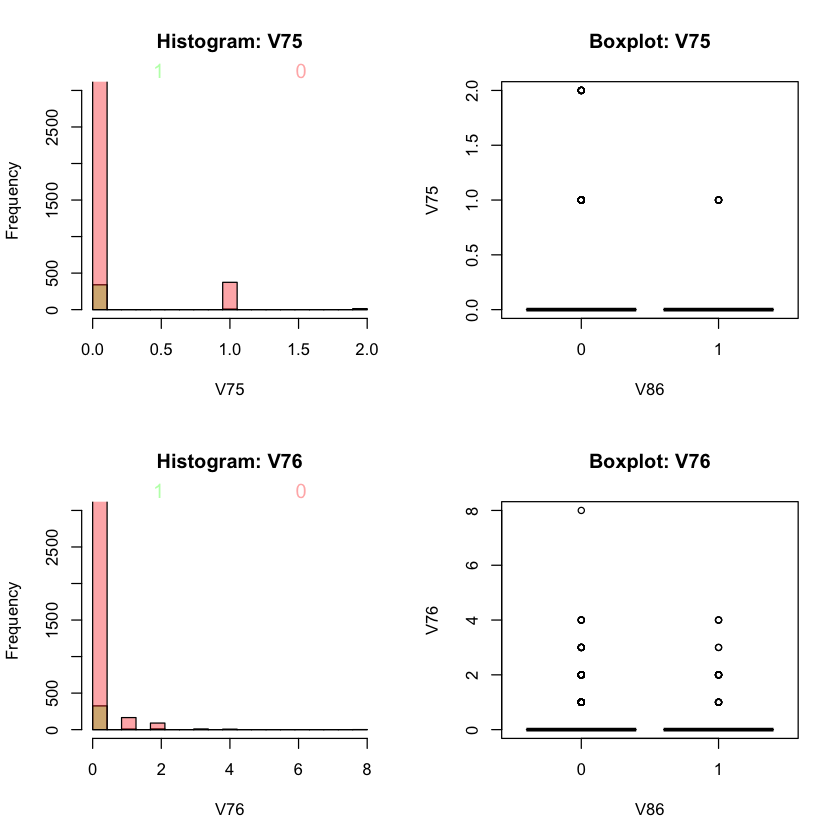

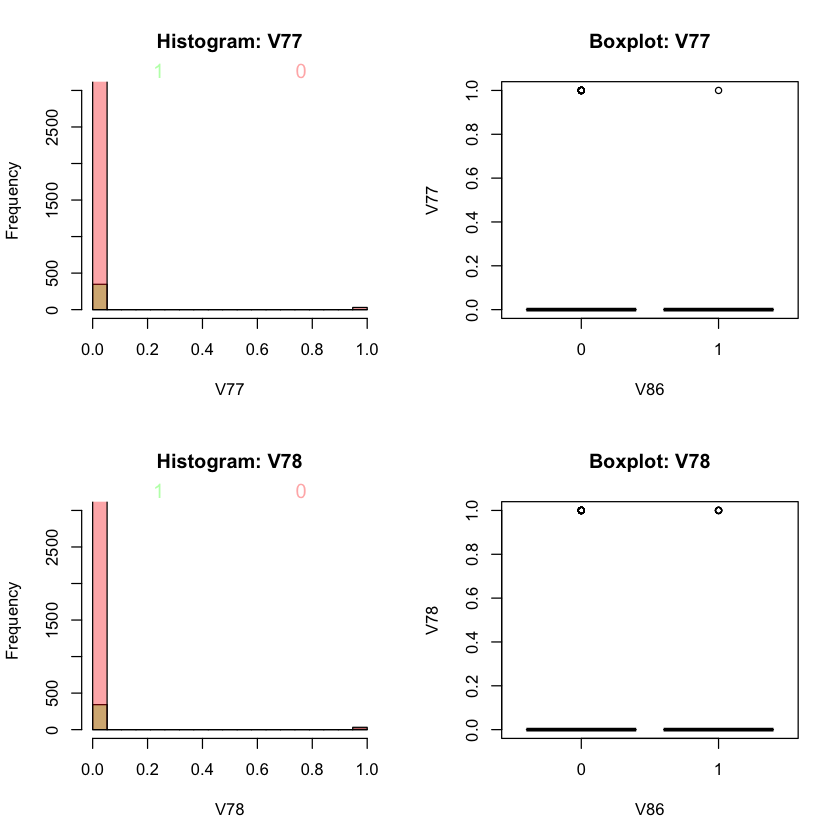

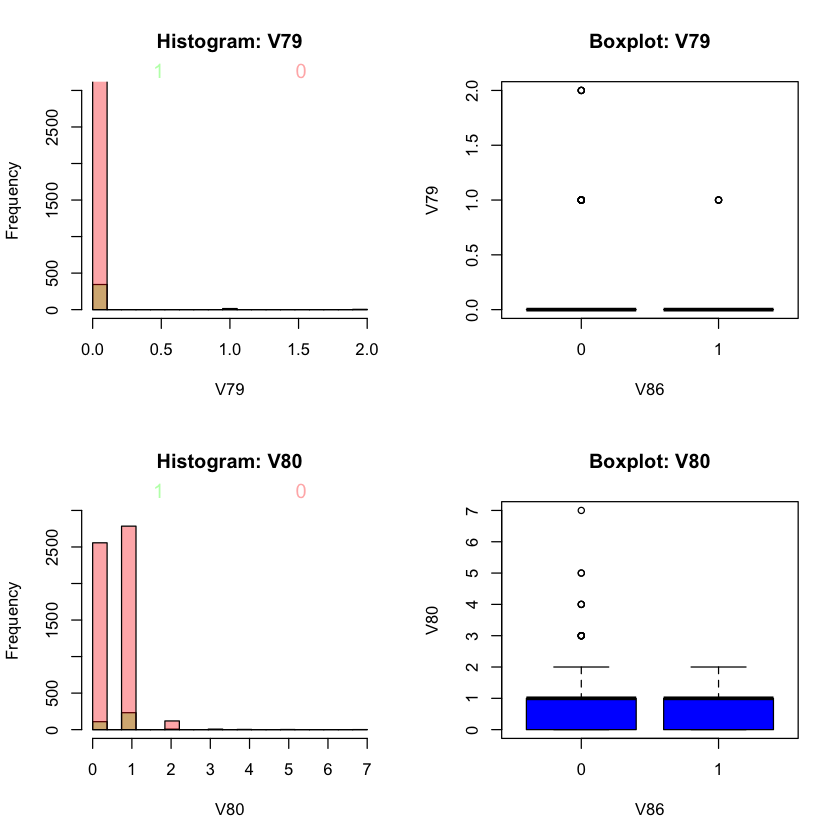

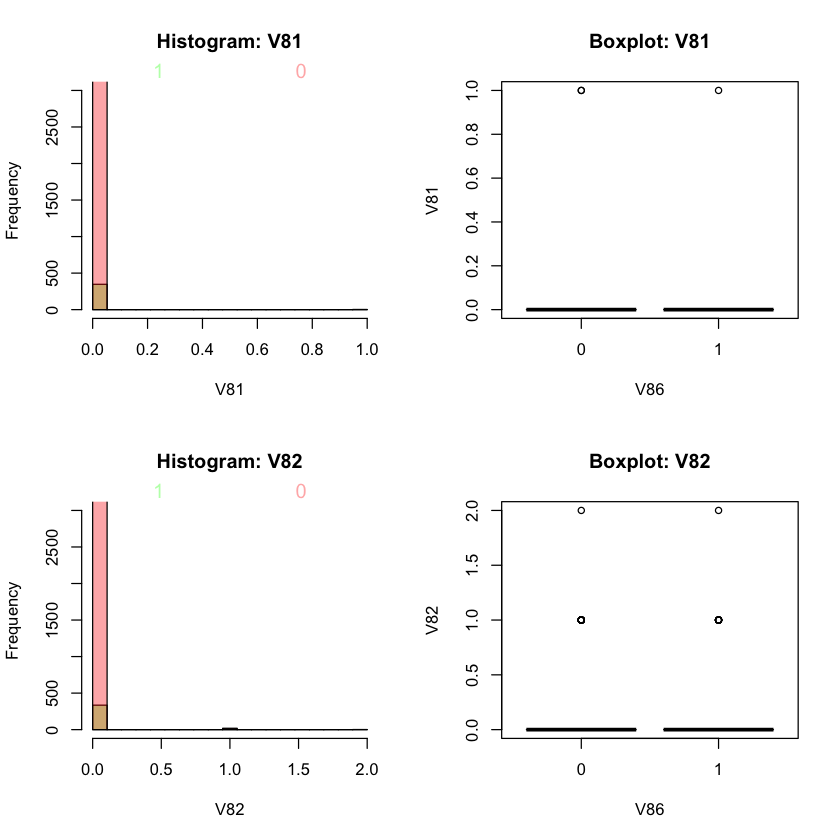

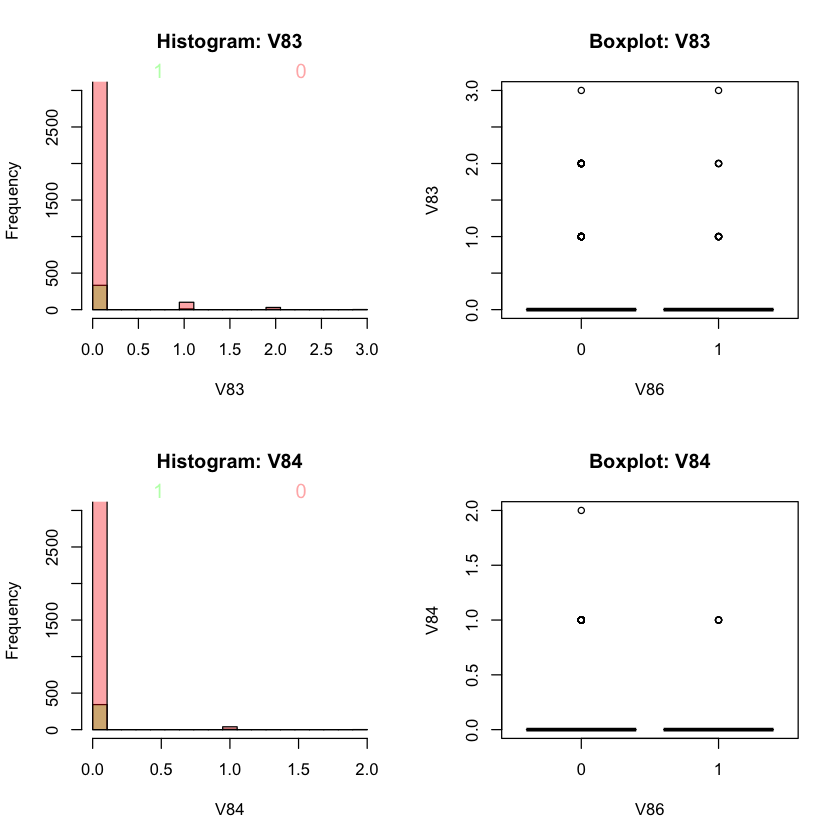

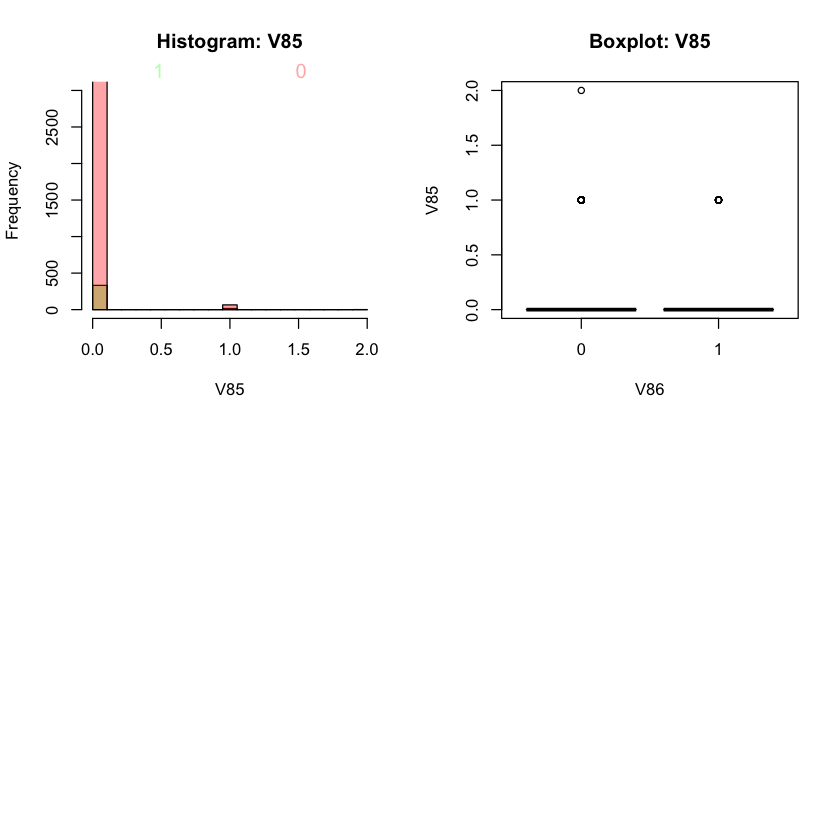

In [8]:
# Define a two-row by two-column plotting area.
par(mfrow = c(2, 2))
d=caravan_data
# Plot a histogram and box plot for each of the predictors,
# by response.
for (x in colnames(d[-ncol(d)])) {
    min_d <- min(d[ , x])
    max_d <- max(d[ , x])
    b <- seq(min_d, max_d, length.out = 20)
    
    hist(d[ , x][d$V86 == 1], col = rgb(0, 1, 0, 0.35), breaks = b,
         main = paste("Histogram: ", x, sep = ""), xlab = x,ylim=c(0,3000))
    
    hist(d[ , x][d$V86 == 0], col = rgb(1, 0, 0, 0.35), breaks = b,
         add = TRUE,ylim=c(0,3000))
    
    mtext(c("1", "0"), adj = c(0.25, 0.75), col = c(rgb(0, 1, 0, 0.35),rgb(1, 0, 0, 0.35)))
    
    boxplot(d[ , x] ~ d$V86, 
            col="blue",
            main = paste("Boxplot: ", x, sep = ""),
            xlab="V86",
            ylab=x)
}














### Observations
* As we see from the above plots for each predictor's distribution the class of 1 is very small as compared to the class of 0, in caravan policy holders. 
* Previous observations on summarising the data have shown that the few of the predictors have more outliers or are heavy tailed as we see in V2, V6, V11 and more. Let's analyse the reason behind it. Take V2 for example which shows that the number of houses owned by the customer. Most customers would generally own a single house, and the others are considered as outliers. Interesting thing would be to think of a customer having many houses, would he be interested in buying a policy for a mobile home, or rather would he own a mobile home. Diving deeper would unfold whether these actually affect the customer's decision in buying or not.
* For some of the predictors such as V18, v43 and similar ones show a rather even distribution of its values corresponding to the classes. The imbalance is similar, but most variables like V41, V44 and similar show a much higher imbalance.
	
	
	



## Reading the test data
As the test data is separated into two files, we at first read them, combine the two and convert the target as factors for modelling purposes



In [9]:

caravan_eval=read.table("ticeval2000.txt")
caravan_tgts=read.table("tictgts2000.txt")
caravan_test <- cbind(caravan_eval, V86 = caravan_tgts$V1)
caravan_test$V86=as.factor(caravan_test$V86)
dim(caravan_test)




Warning message in file(file, "rt"):
“cannot open file 'ticeval2000.txt': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


### Class Imbalance

In [ ]:

x <- table(caravan_test$V86)
labels <- c("0", "1")
pct <- round(x/sum(x)*100,2)
lbls <- paste(pct,"%",sep="") # ad % to labels
pie(x,labels = lbls, col=rainbow(length(lbls)),main="customers of caravan policy")
legend("topright", labels, cex=0.8,fill=rainbow(length(x)))
